# Notebook to generate all the graphs needed for the prasentation 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pymatching
import stim

circ_path = "circuits/"
plot_path = "plots/"

In [17]:
from functions.steane_code_generators import rec_factory, create_surface_steane_ciruit, add_noise
from functions.analysis import plot_factory_set, count_logical_errors, determine_slope

In [18]:
GLOBAL_NUM_SHOTS = 100_000
GLOBAL_NOISE_SET = np.logspace(-2,-0.9)

# 1. Basic Errors without final stabilizer

<Figure size 640x480 with 0 Axes>

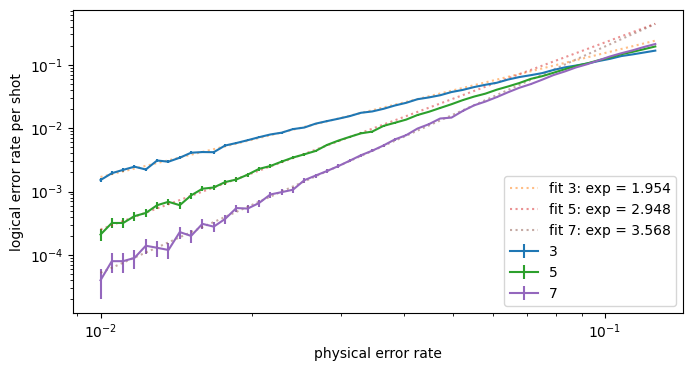

In [19]:

factory_set = [
    rec_factory(
        distance=d,
        basic_errors=True,
        fix_X_errors=True,
        fix_Z_errors=True,
        two_qubit_gate_errors=False,
        final_detector_set=False,
        single_qubit_gate_errors=False,
        basic_error_aux=False,
        
    ) 
    for d in [3,5,7]
]
noise_set_basic, log_error_data_basic, y_errs_basic = plot_factory_set(
    factory_set,
    num_shots=GLOBAL_NUM_SHOTS,
    noise_set=GLOBAL_NOISE_SET,
    filename="basic_error",
    reference_lines=False,
    acc_ref_lines=True,
)

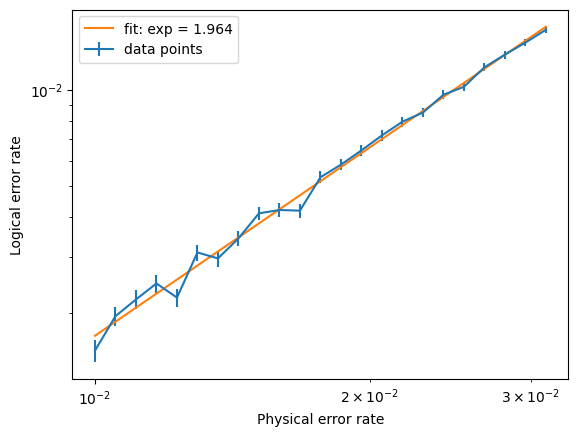

<Figure size 640x480 with 0 Axes>

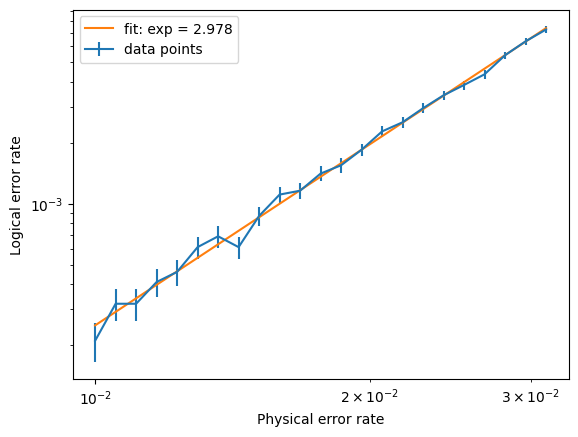

<Figure size 640x480 with 0 Axes>

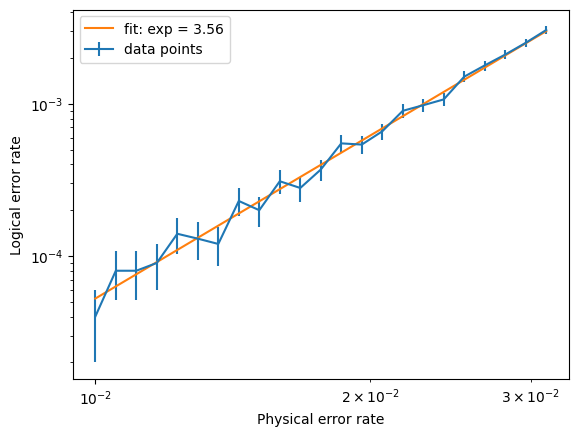

<Figure size 640x480 with 0 Axes>

In [20]:
high_p_cutoff = 10**-1.5 

noise_set = noise_set_basic
log_error_data = log_error_data_basic
y_errs = y_errs_basic

i_cutoff = np.argmax(noise_set>high_p_cutoff)
for i,log_e_rate  in enumerate(log_error_data):
    determine_slope(
        noise_set[:i_cutoff],
        log_prob=log_e_rate[:i_cutoff],
        yerr=y_errs[i][:i_cutoff],
        plot=True,
        plotpath=plot_path+f"slope_{i}.pdf"
        )

In [21]:
test_circ = create_surface_steane_ciruit(
    distance=3,
    detectors=True, 
    final_detector_set=False,
    basic_error_aux=False,
    basic_errors=True,
)
if 1:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'prasentation_basic.svg', 'w') as f:
        f.write(str(diagram))

In [22]:
test_circ = create_surface_steane_ciruit(
    distance=5,
    detectors=True, 
    final_detector_set=False,
    basic_error_aux=False,
    basic_errors=False,
)
if 1:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'prasentation_d5.svg', 'w') as f:
        f.write(str(diagram))

# Going FT 

Start with adding DEPO2 noise to the CNOT gates

<Figure size 640x480 with 0 Axes>

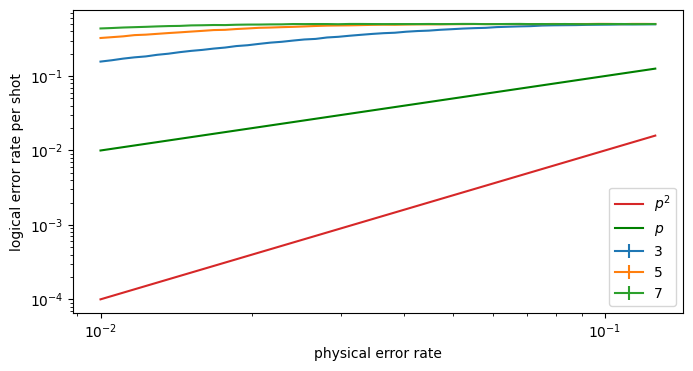

In [23]:
# Set without final step stabilizers
factory_set = [
    rec_factory(
        distance=d,
        basic_errors=True,
        fix_X_errors=True,
        fix_Z_errors=True,
        two_qubit_gate_errors=True,
        final_detector_set=False,
    ) 
    for d in [3,5,7]
]
noise_set_failed_ft, log_error_data_failed_ft, y_errs_failed_ft = plot_factory_set(
    factory_set,
    num_shots=GLOBAL_NUM_SHOTS,
    noise_set=GLOBAL_NOISE_SET,
    filename="cnot_failure",
    reference_lines=True,
)

# overcoming Failure (using more detectors)

<Figure size 640x480 with 0 Axes>

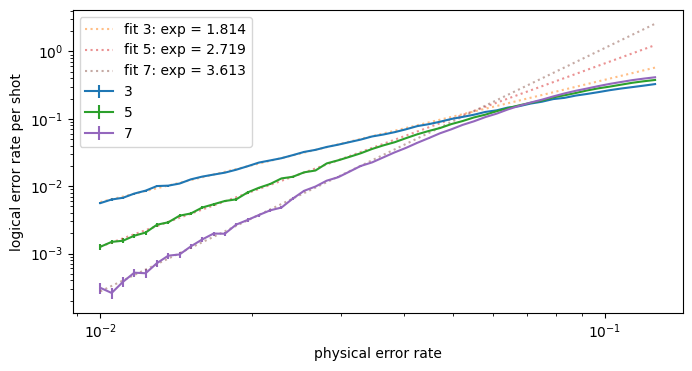

In [24]:
factory_set = [
    rec_factory(
        distance=d,
        basic_errors=True,
        fix_X_errors=True,
        fix_Z_errors=True,
        two_qubit_gate_errors=True,
        final_detector_set=True,
    ) 
    for d in [3,5,7]
]
noise_set_depo_cnot, log_error_data_depo_cnot, y_errs_depo_cnot = plot_factory_set(
    factory_set,
    num_shots=GLOBAL_NUM_SHOTS,
    noise_set=GLOBAL_NOISE_SET,
    filename="cnot_working",
    acc_ref_lines=True,
)

In [25]:
test_circ = create_surface_steane_ciruit(
    distance=3,
    basic_errors=True,
    fix_X_errors=True,
    fix_Z_errors=True,
    final_detector_set=True,
)
noise = 0.05
noise_model = {
    "single_qubit_gate": {
        "error": "DEPOLARIZE1",
        "noise": noise,
    },
    "two_qubit_gate": {
        "error": "DEPOLARIZE2",
        "noise": noise,
    },
    "measurement": {
        "error": "X_ERROR",
        "noise": 0.003,
    },
    "initialize": {
        "error": "X_ERROR",
        "noise": 0.003,
    },
}
test_circ = add_noise(test_circ,noise_model,two_qubit_gate_errors=True)
if 1:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'prasentation_cnot.svg', 'w') as f:
        f.write(str(diagram))

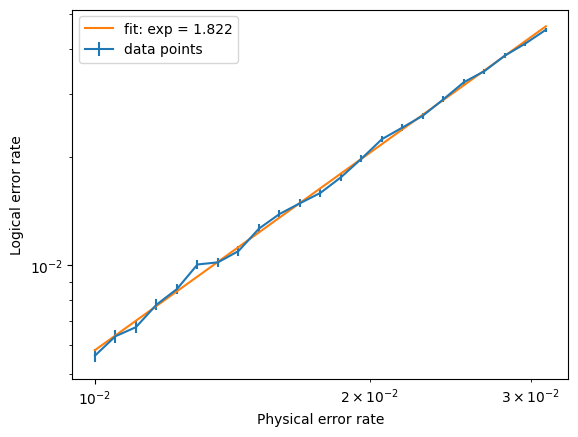

<Figure size 640x480 with 0 Axes>

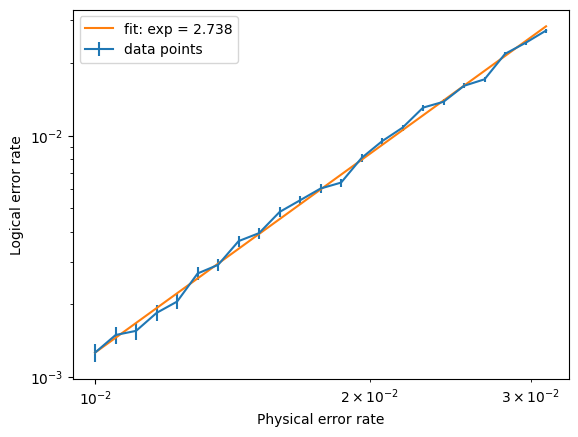

<Figure size 640x480 with 0 Axes>

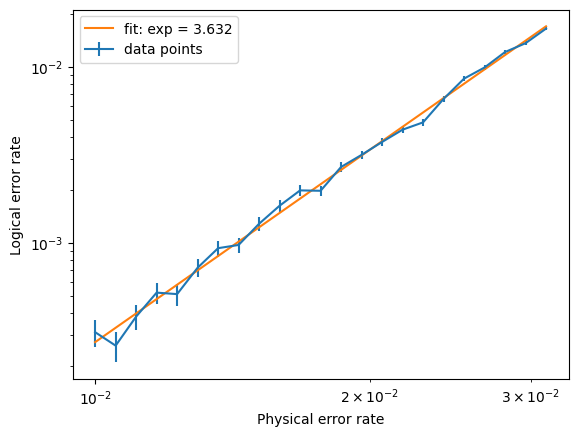

<Figure size 640x480 with 0 Axes>

In [26]:
high_p_cutoff = 10**-1.5 

noise_set = noise_set_depo_cnot 
y_errs = y_errs_depo_cnot 
log_error_data = log_error_data_depo_cnot  

i_cutoff = np.argmax(noise_set>high_p_cutoff)
for i,log_e_rate  in enumerate(log_error_data):
    determine_slope(
        noise_set[:i_cutoff],
        log_prob=log_e_rate[:i_cutoff],
        yerr=y_errs[i][:i_cutoff],
        plot=True,
        plotpath=plot_path+f"slope_{i}.pdf",
        )

# Road to FT 
basic erros on the aux qubits after initilization

/home/leo/Documents/MasterArbeit/code/steane_type/functions/analysis.py:51: RuntimeWarning: divide by zero encountered in log
  y, x= clean_array(np.log(log_prob), np.log(noise))


<Figure size 640x480 with 0 Axes>

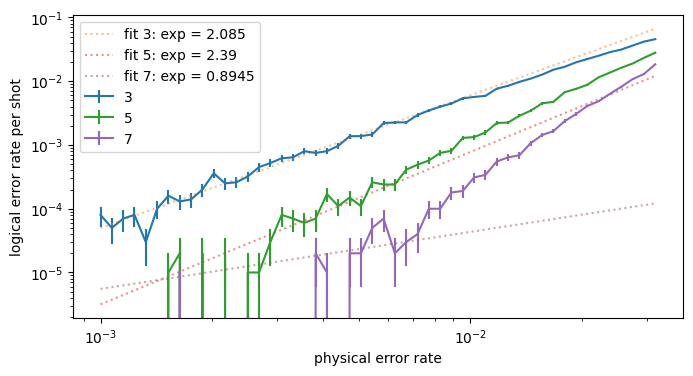

In [27]:
# testing
factory_set = [
    rec_factory(
        distance=d,
        basic_errors=True,
        fix_X_errors=True,
        fix_Z_errors=True,
        final_detector_set=True,
        two_qubit_gate_errors=True,
        basic_error_aux=False,
        measurement_errors=False,
    ) 
    for d in [3,5,7]
]

deeper_noise_set = np.logspace(-3,-1.5)
noise_set_full_errors, log_error_data_full_errors, y_errs_full_errors = plot_factory_set(
    factory_set,
    num_shots=GLOBAL_NUM_SHOTS,
    noise_set=deeper_noise_set,
    filename="ft_testing",
    acc_ref_lines=True,
)

/home/leo/Documents/MasterArbeit/code/steane_type/functions/analysis.py:51: RuntimeWarning: divide by zero encountered in log
  y, x= clean_array(np.log(log_prob), np.log(noise))


<Figure size 640x480 with 0 Axes>

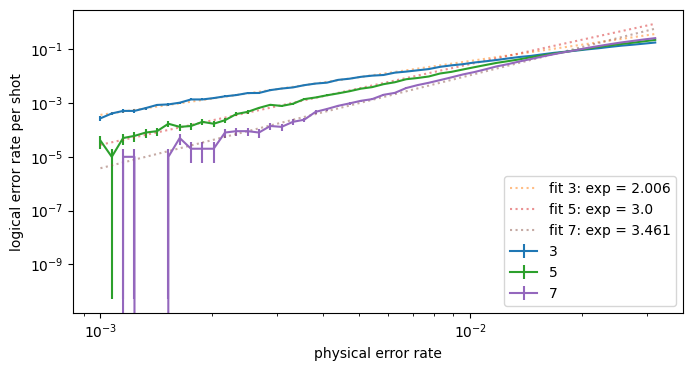

In [28]:
# should work
factory_set = [
    rec_factory(
        distance=d,
        basic_errors=True,
        fix_X_errors=True,
        fix_Z_errors=True,
        final_detector_set=True,
        two_qubit_gate_errors=True,
        basic_error_aux=True,
        measurement_errors=True,
    ) 
    for d in [3,5,7]
]
deeper_noise_set = np.logspace(-3,-1.5)
noise_set_full_errors, log_error_data_full_errors, y_errs_full_errors = plot_factory_set(
    factory_set,
    num_shots=GLOBAL_NUM_SHOTS,
    noise_set=deeper_noise_set,
    filename="ft_all_errors",
    acc_ref_lines=True,
)

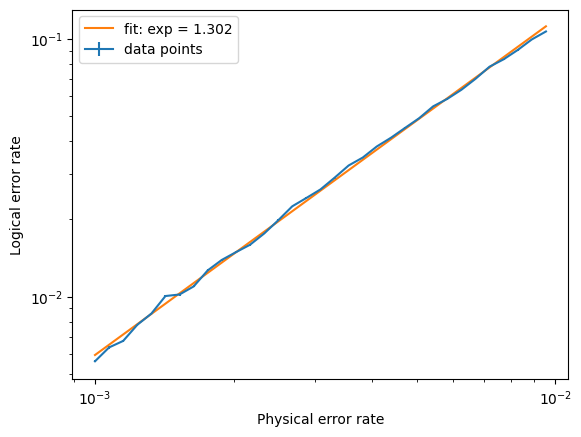

<Figure size 640x480 with 0 Axes>

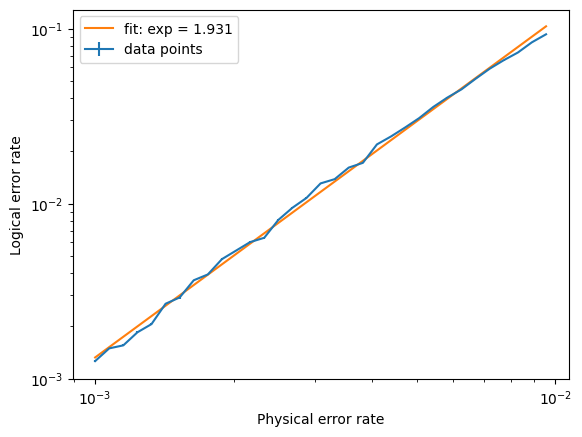

<Figure size 640x480 with 0 Axes>

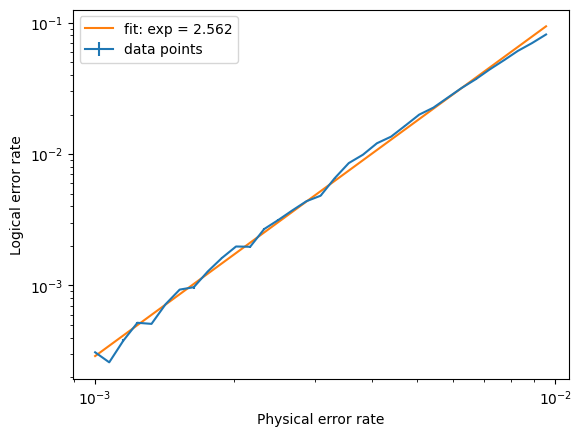

<Figure size 640x480 with 0 Axes>

In [29]:
high_p_cutoff = 10**-2

noise_set = noise_set_full_errors
y_errs = y_errs_full_errors
log_error_data_full_errors = log_error_data_full_errors

i_cutoff = np.argmax(noise_set>high_p_cutoff)
for i,log_e_rate  in enumerate(log_error_data):
    determine_slope(
        noise_set[:i_cutoff],
        log_prob=log_e_rate[:i_cutoff],
        yerr=y_errs[i][:i_cutoff],
        plot=True,
        plotpath=plot_path+f"slope_{i}.pdf",
        )

In [30]:
test_circ = create_surface_steane_ciruit(
    distance=3,
    basic_errors=True,
    basic_error_aux=True,
    fix_X_errors=True,
    fix_Z_errors=True,
    final_detector_set=True,
)
noise = 0.05
noise_model = {
    "single_qubit_gate": {
        "error": "DEPOLARIZE1",
        "noise": noise,
    },
    "two_qubit_gate": {
        "error": "DEPOLARIZE2",
        "noise": noise,
    },
    "measurement": {
        "error": "X_ERROR",
        "noise": noise,
    },
    "initialize": {
        "error": "X_ERROR",
        "noise": noise,
    },
}
test_circ = add_noise(test_circ,
                      noise_model,
                      two_qubit_gate_errors=True,
                      single_qubit_gate_errors=True,
                      measurement_errors=True,
                      )
if 1:
    diagram = test_circ.diagram("timeline-svg")  
    with open(circ_path + 'presentation_ft.svg', 'w') as f:
        f.write(str(diagram))